# Data Mining Process

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data Collection and Importing the Data

In [168]:
#Reading the dataset 
df = pd.read_csv("EarthCam_DataScience_Data.csv")

# Data Cleaning and Wrangling

### Handling Missing Values in DataFrame

In [169]:
#Checking for the null values
for col in df.columns:
    print(col + ': ' + str(df[col].isna().sum()))

ObservedAt: 0
ObservedAt_DateTime: 0
Station: 0
Record: 0
ID: 0
datetime: 0
Temperature: 0
Dewpoint: 0
FeelsLike: 0
HeatIndex: 0
Windchill: 0
Pressure: 0
Precipitation: 0
Wind: 0
RelativeHumidity: 0
CurrentConditions: 0
CurrentConditionsAbbreviation: 6241
ConditionType: 0
CloudCondition: 0
CloudReport: 0
Visibility: 0
Clouds: 0
Lightning: 0
SunInfo: 0
MoonInfo: 0
raw: 0
daily_total_precipitation: 7324


In [170]:
#If a column has a number of missing values greater than or equal to the threshold then dropped from the DataFrame.
threshhold = 0.6*len(df)

for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count >= threshhold:
        df.drop(col, axis=1, inplace=True)

In [171]:
#Checking Columns
df.columns

Index(['ObservedAt', 'ObservedAt_DateTime', 'Station', 'Record', 'ID',
       'datetime', 'Temperature', 'Dewpoint', 'FeelsLike', 'HeatIndex',
       'Windchill', 'Pressure', 'Precipitation', 'Wind', 'RelativeHumidity',
       'CurrentConditions', 'ConditionType', 'CloudCondition', 'CloudReport',
       'Visibility', 'Clouds', 'Lightning', 'SunInfo', 'MoonInfo', 'raw'],
      dtype='object')

### Checking Missing values again

In [172]:
#Checking for null values
df.isna().sum()

ObservedAt             0
ObservedAt_DateTime    0
Station                0
Record                 0
ID                     0
datetime               0
Temperature            0
Dewpoint               0
FeelsLike              0
HeatIndex              0
Windchill              0
Pressure               0
Precipitation          0
Wind                   0
RelativeHumidity       0
CurrentConditions      0
ConditionType          0
CloudCondition         0
CloudReport            0
Visibility             0
Clouds                 0
Lightning              0
SunInfo                0
MoonInfo               0
raw                    0
dtype: int64

### Handling DType of all the Columns

In [173]:
#Getting all columns info
for col in df.columns:
    print(col + ': ' +str(df[col].dtype))

ObservedAt: int64
ObservedAt_DateTime: object
Station: object
Record: object
ID: int64
datetime: object
Temperature: object
Dewpoint: object
FeelsLike: object
HeatIndex: object
Windchill: object
Pressure: object
Precipitation: object
Wind: object
RelativeHumidity: float64
CurrentConditions: object
ConditionType: object
CloudCondition: object
CloudReport: object
Visibility: object
Clouds: object
Lightning: object
SunInfo: object
MoonInfo: object
raw: object


In [174]:
from datetime import datetime
df['Date & Time'] = pd.to_datetime(df['ObservedAt_DateTime'])

In [175]:
#Drop the column
df = df.drop('ObservedAt_DateTime', axis=1)

In [176]:
# Extract the day, month, year and time from Date & Time column.
df['Day'] = df['Date & Time'].dt.day
df['Month'] = df['Date & Time'].dt.month
df['Year'] = df['Date & Time'].dt.year
df['Time'] = df['Date & Time'].dt.time

In [177]:
#Extract the timezone from datetime
df['Timezone'] = df['datetime'].str.split(": '").str[1].str.split("',").str[0].str.strip()

In [178]:
#Dropping datetime column as collumn.
df = df.drop('datetime', axis=1)

In [179]:
# Convert the strings to dictionaries using eval()
df['Precipitation'] = df['Precipitation'].apply(eval)

# Extract 'Day' and 'Day_snow' values from Precipitation
df['precipitation_rain'] = df['Precipitation'].apply(lambda x: x['Day']['In'])
df['precipitation_snow'] = df['Precipitation'].apply(lambda x: x['Day_snow']['In'])

In [180]:
# Convert the strings to dictionaries using eval()
df['MoonInfo'] = df['MoonInfo'].apply(eval)
df['MoonInfo'] = df['MoonInfo'].apply(lambda x: x['PhaseName'])

In [181]:
# Convert the strings to dictionaries using eval()
df['Wind'] = df['Wind'].apply(eval)
df['Wind_Speed_MPH'] = df['Wind'].apply(lambda x: x['Speed']['MilesPerHour'])

In [182]:
df.head()

,ObservedAt,Station,Record,ID,Temperature,Dewpoint,FeelsLike,HeatIndex,Windchill,Pressure,...,raw,Date & Time,Day,Month,Year,Time,Timezone,precipitation_rain,precipitation_snow,Wind_Speed_MPH
0,1525172100,KJOT,011055Z AUTO 19004KT 10SM CLR 13/03 A3000 RMK ...,220160752,"{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.92, 'InchesOfMercury': 30}",...,AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T013...,2018-05-01 05:55:00,1,5,2018,05:55:00,America/Chicago,0.0,0,4.6
1,1525193700,KJOT,011655Z AUTO 23013G23KT 10SM SCT065 27/11 A299...,220215015,"{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.58, 'InchesOfMercury': 29.99}",...,AUTO 23013G23KT 10SM SCT065 27/11 A2999 RMK AO...,2018-05-01 11:55:00,1,5,2018,11:55:00,America/Chicago,0.0,0,15.0
2,1525215300,KJOT,012255Z AUTO 19012G20KT 10SM CLR 28/09 A2991 R...,220262557,"{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}",...,AUTO 19012G20KT 10SM CLR 28/09 A2991 RMK AO2 T...,2018-05-01 17:55:00,1,5,2018,17:55:00,America/Chicago,0.0,0,13.8
3,1525236900,KJOT,020455Z AUTO 20013G18KT 10SM CLR 23/11 A2994 R...,220311850,"{'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}",...,AUTO 20013G18KT 10SM CLR 23/11 A2994 RMK AO2 T...,2018-05-01 23:55:00,1,5,2018,23:55:00,America/Chicago,0.0,0,15.0
4,1525258500,KJOT,021055Z AUTO 21008KT 10SM CLR 21/11 A2991 RMK ...,220363232,"{'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}",...,AUTO 21008KT 10SM CLR 21/11 A2991 RMK AO2 T020...,2018-05-02 05:55:00,2,5,2018,05:55:00,America/Chicago,0.0,0,9.2


In [183]:
#Extracting the elements from columns
df['Dewpoint_Celsius'] = df['Dewpoint'].str.extract(r"'Celsius': (\d+)")
df['Dewpoint_Fahrenheit'] = df['Dewpoint'].str.extract(r"'Fahrenheit': (\d+)")
df['FeelsLike_Celsius'] = df['FeelsLike'].str.extract(r"'Celsius': (\d+)")
df['FeelsLike_Fahrenheit'] = df['FeelsLike'].str.extract(r"'Fahrenheit': (\d+)")
df['Pressure_In_Inches_of_Mercury'] = df['Pressure'].str.extract(r"'InchesOfMercury': (\d+)")
df['Visibility_In_Miles'] = df['Visibility'].str.extract(r"'Miles': (\d+)")
df['SunInfo_Sun-UP'] = df['SunInfo'].str.extract(r"'IsSunUp': (\w+)", expand=False)
df['Target_Fahrenheit'] = df['Temperature'].str.extract(r"'Fahrenheit': (\d+)")
df['Target_Celsius'] = df['Temperature'].str.extract(r"'Celsius': (\d+)")

In [184]:
#Dropping columns
df = df.drop(['ObservedAt', 'Record', 'ID', 'Dewpoint', 'FeelsLike', 'HeatIndex', 'Windchill', 'Pressure', 'Precipitation', 'Wind', 'Visibility', 'SunInfo', 'raw', 'Date & Time', 'Temperature', 'Clouds','Lightning', 'Station', 'precipitation_snow'], axis =1)

In [185]:
#Printing the df after dropping columns
df.head()

,RelativeHumidity,CurrentConditions,ConditionType,CloudCondition,CloudReport,MoonInfo,Day,Month,Year,Time,...,Wind_Speed_MPH,Dewpoint_Celsius,Dewpoint_Fahrenheit,FeelsLike_Celsius,FeelsLike_Fahrenheit,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,SunInfo_Sun-UP,Target_Fahrenheit,Target_Celsius
0,0.509,Clear Skies,Clear,Clear Skies,Clear Skies,Full Moon,1,5,2018,05:55:00,...,4.6,3,37,13,55,30,10,True,55,13
1,0.368,Scattered,Cloudy,Scattered,Scattered,Full Moon,1,5,2018,11:55:00,...,15.0,11,52,27,81,29,10,True,81,27
2,0.303,Clear Skies,Clear,Clear Skies,Clear Skies,Full Moon,1,5,2018,17:55:00,...,13.8,9,48,28,82,29,10,True,82,28
3,0.468,Clear Skies,Clear,Clear Skies,Clear Skies,Waning Gibbous,1,5,2018,23:55:00,...,15.0,11,52,23,73,29,10,False,73,23
4,0.530,Clear Skies,Clear,Clear Skies,Clear Skies,Waning Gibbous,2,5,2018,05:55:00,...,9.2,11,52,21,70,29,10,True,70,21


In [186]:
#Filling the missing values
df['Target_Celsius'].fillna(method='bfill', inplace=True)
df['Target_Fahrenheit'].fillna(method='bfill', inplace=True)

In [187]:
list1 = ['Dewpoint_Fahrenheit','Dewpoint_Celsius','FeelsLike_Fahrenheit','FeelsLike_Celsius',
       'Pressure_In_Inches_of_Mercury', 'Visibility_In_Miles', 'Target_Fahrenheit','Target_Celsius']

for col in list1:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RelativeHumidity               7324 non-null   float64
 1   CurrentConditions              7324 non-null   object 
 2   ConditionType                  7324 non-null   object 
 3   CloudCondition                 7324 non-null   object 
 4   CloudReport                    7324 non-null   object 
 5   MoonInfo                       7324 non-null   object 
 6   Day                            7324 non-null   int64  
 7   Month                          7324 non-null   int64  
 8   Year                           7324 non-null   int64  
 9   Time                           7324 non-null   object 
 10  Timezone                       7324 non-null   object 
 11  precipitation_rain             7324 non-null   float64
 12  Wind_Speed_MPH                 7324 non-null   f

In [189]:
#Convert time to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [190]:
#Getting categorical columns 
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)

print(categorical_columns)

['CurrentConditions', 'ConditionType', 'CloudCondition', 'CloudReport', 'MoonInfo', 'Timezone', 'SunInfo_Sun-UP']


In [191]:
#Getting Numerical columns 
numerical_columns = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numerical_columns.append(column)

print(numerical_columns)

['RelativeHumidity', 'Day', 'Month', 'Year', 'precipitation_rain', 'Wind_Speed_MPH', 'Dewpoint_Celsius', 'Dewpoint_Fahrenheit', 'FeelsLike_Celsius', 'FeelsLike_Fahrenheit', 'Pressure_In_Inches_of_Mercury', 'Visibility_In_Miles', 'Target_Fahrenheit', 'Target_Celsius']


In [192]:
def calculate_mode(series):           #taking the series as input
    return series.mode().iat[0]       #Returning the mode(most frequent value)

# Group the data by "Year", "Month", and "Day" columns and apply the custom aggregation function
grouped_df = df.groupby(["Year", "Month", "Day"]).agg({
    "RelativeHumidity": "mean",
    "precipitation_rain": "mean",# Calculate mean for RelativeHumidity column
    "Wind_Speed_MPH": "mean",  # Calculate mean for Wind_Speed_MPH column
    "Dewpoint_Fahrenheit": "mean",
    "Dewpoint_Celsius": "mean",
    "FeelsLike_Fahrenheit": "mean",
    "FeelsLike_Celsius": "mean",
    "Pressure_In_Inches_of_Mercury": "mean",
    "Visibility_In_Miles": "mean",
    "CurrentConditions": calculate_mode,
    "ConditionType": calculate_mode,
    "CloudCondition": calculate_mode,
    "MoonInfo": calculate_mode,
    "Timezone": calculate_mode,
    "SunInfo_Sun-UP": calculate_mode,
    "Target_Fahrenheit": "mean",
    "Target_Celsius": "mean"
    # Add more categorical columns here
}).reset_index()



In [193]:
grouped_df.head()

,Year,Month,Day,RelativeHumidity,precipitation_rain,Wind_Speed_MPH,Dewpoint_Fahrenheit,Dewpoint_Celsius,FeelsLike_Fahrenheit,FeelsLike_Celsius,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,CurrentConditions,ConditionType,CloudCondition,MoonInfo,Timezone,SunInfo_Sun-UP,Target_Fahrenheit,Target_Celsius
0,2018,5,1,0.41200,0.0,12.100,47.25,8.50,72.75,22.75,29.25,10.00,Clear Skies,Clear,Clear Skies,Full Moon,America/Chicago,True,72.75,22.75
1,2018,5,2,0.55175,0.0,9.775,58.50,14.75,76.50,24.75,29.00,10.00,Clear Skies,Clear,Clear Skies,Waning Gibbous,America/Chicago,True,76.50,24.75
2,2018,5,3,0.87450,0.0,7.500,65.00,18.50,69.25,20.75,29.00,9.25,Scattered,Cloudy,Overcast Sky,Waning Gibbous,America/Chicago,True,69.25,20.75
3,2018,5,4,0.64875,0.0,8.350,54.25,12.25,67.50,19.75,29.25,10.00,Clear Skies,Clear,Clear Skies,Waning Gibbous,America/Chicago,True,67.50,19.75
4,2018,5,5,0.49125,0.0,3.725,44.50,7.00,68.75,20.50,29.50,10.00,Clear Skies,Clear,Clear Skies,Waning Gibbous,America/Chicago,True,68.75,20.50


# Exploratory Data Analysis

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

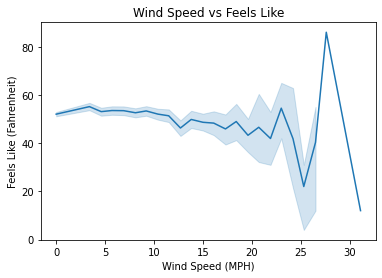

In [195]:
#linePlot Wind speed vs Feels Like in Fahrenheit
sns.lineplot(data=df, x='Wind_Speed_MPH', y='FeelsLike_Fahrenheit')
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Feels Like (Fahrenheit)')
plt.title('Wind Speed vs Feels Like')
plt.show()

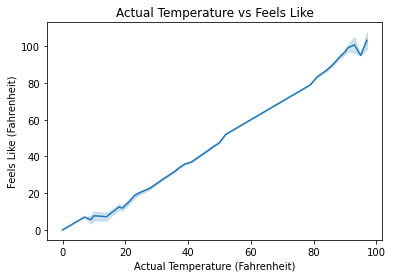

In [196]:
# LinePlot Target Actual temparature vs feels like
sns.lineplot(data=df, x='Target_Fahrenheit', y='FeelsLike_Fahrenheit')
plt.xlabel('Actual Temperature (Fahrenheit)')
plt.ylabel('Feels Like (Fahrenheit)')
plt.title('Actual Temperature vs Feels Like')
plt.show()

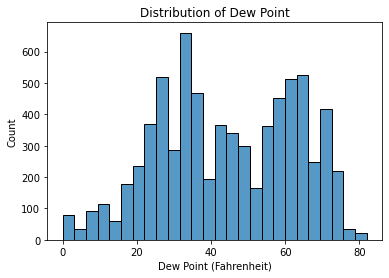

In [197]:
# Histogram plot distribution of duepoint.
sns.histplot(data=df, x='Dewpoint_Fahrenheit')
plt.xlabel('Dew Point (Fahrenheit)')
plt.ylabel('Count')
plt.title('Distribution of Dew Point')
plt.show()

In [198]:
#Plot to show Avergage Temperature by Year.
import plotly.graph_objects as go

yearly_temperatures = df.groupby("Year")["Target_Fahrenheit"].mean()

# Create the line plot
fig = go.Figure(data=go.Scatter(x=yearly_temperatures.index, y=yearly_temperatures.values))

# Set the axis labels and title
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Temperature (Fahrenheit)",
    title="Average Temperature by Year"
)

# Display the plot
fig.show()

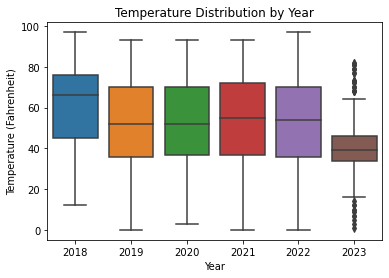

In [199]:
#

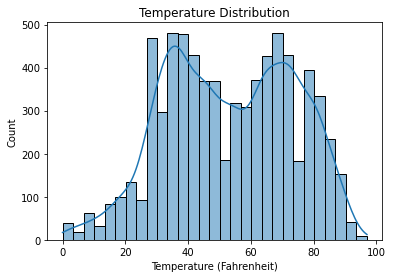

In [200]:
# Histogram plot to display the temprature distribution.
sns.histplot(data=df, x="Target_Fahrenheit", kde=True)

# Set the axis labels and title
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.title('Temperature Distribution')

# Display the plot
plt.show()

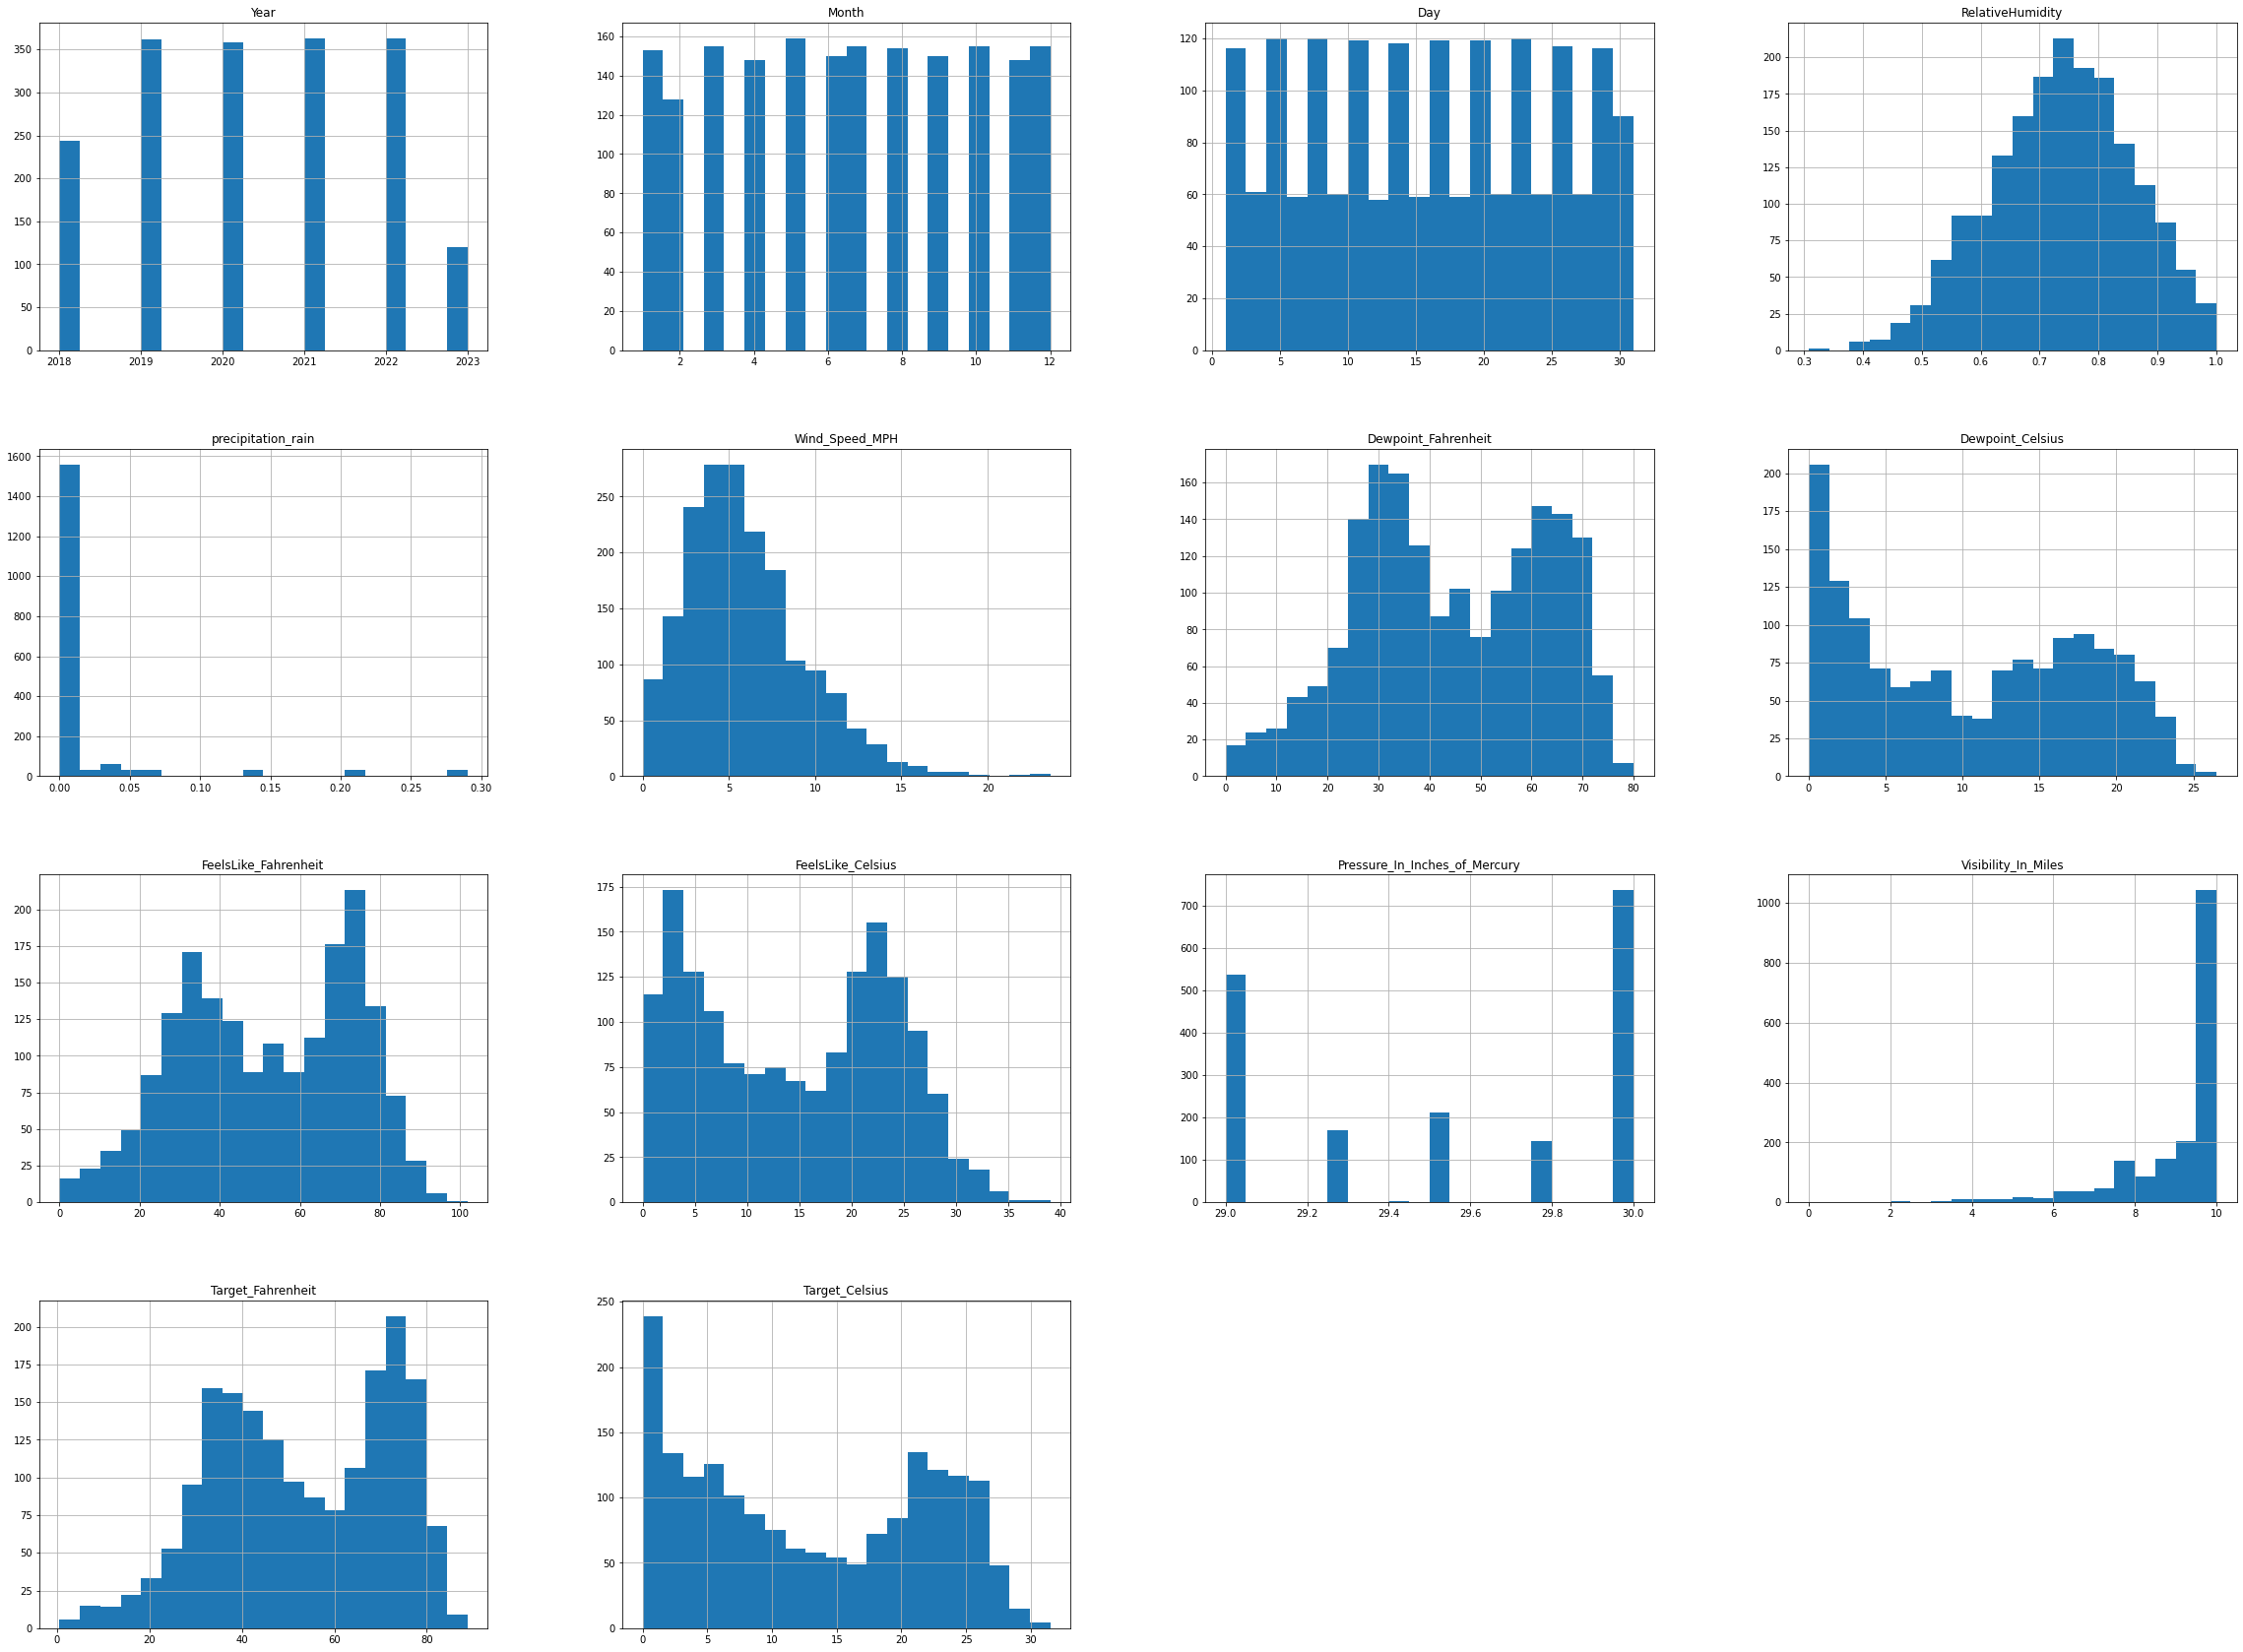

In [201]:
#histogram of Group by df.
grouped_df.hist(bins=20, figsize=(40,30))
plt.show()

In [202]:
grouped_df.head(3)

,Year,Month,Day,RelativeHumidity,precipitation_rain,Wind_Speed_MPH,Dewpoint_Fahrenheit,Dewpoint_Celsius,FeelsLike_Fahrenheit,FeelsLike_Celsius,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,CurrentConditions,ConditionType,CloudCondition,MoonInfo,Timezone,SunInfo_Sun-UP,Target_Fahrenheit,Target_Celsius
0,2018,5,1,0.41200,0.0,12.100,47.25,8.50,72.75,22.75,29.25,10.00,Clear Skies,Clear,Clear Skies,Full Moon,America/Chicago,True,72.75,22.75
1,2018,5,2,0.55175,0.0,9.775,58.50,14.75,76.50,24.75,29.00,10.00,Clear Skies,Clear,Clear Skies,Waning Gibbous,America/Chicago,True,76.50,24.75
2,2018,5,3,0.87450,0.0,7.500,65.00,18.50,69.25,20.75,29.00,9.25,Scattered,Cloudy,Overcast Sky,Waning Gibbous,America/Chicago,True,69.25,20.75


In [203]:
# Line plot to show year trends of multiple columns
import plotly.graph_objects as go

# Calculate yearly average temperatures
yearly_temperatures = grouped_df.groupby("Year")["Target_Fahrenheit"].mean()
years = yearly_temperatures.index

# Create figure and add trace for average temperature
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=years,
    y=yearly_temperatures.values,
    mode='lines',
    name='Average Temperature (Fahrenheit)'
))

# Additional columns
columns = ["RelativeHumidity", "precipitation_rain", "Wind_Speed_MPH", 
           "Dewpoint_Fahrenheit", "FeelsLike_Fahrenheit", "Pressure_In_Inches_of_Mercury", "Visibility_In_Miles"]

# Add traces for additional columns
for column in columns:
    yearly_values = grouped_df.groupby("Year")[column].mean()
    fig.add_trace(go.Scatter(
        x=years,
        y=yearly_values.values,
        mode='lines',
        name=column
    ))

# Customize layout
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Value'),
    title='Yearly Trends',
    showlegend=True
)

fig.update_annotations(dict(xref="paper", yref="paper", x=0.5, y=1.2, showarrow=False,
                            text="Yearly Trends", font=dict(size=18)))


# Display the plot
fig.show()


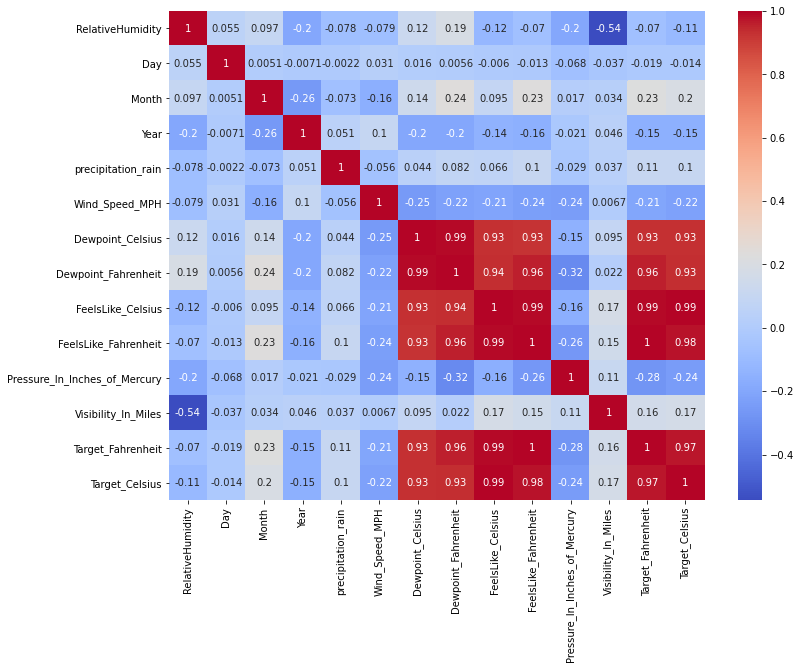

In [204]:
#Correlation matrix for the numerical columns to visualize the correlation 
corr_matrix = grouped_df[numerical_columns].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [205]:
#Calculates the correlation matrix between the selected numerical columns
corr = grouped_df[numerical_columns].corr()['Target_Fahrenheit']
corr_sorted = corr.abs().sort_values(ascending=False)
print(corr_sorted)

Target_Fahrenheit                1.000000
FeelsLike_Fahrenheit             0.995564
FeelsLike_Celsius                0.990338
Target_Celsius                   0.971748
Dewpoint_Fahrenheit              0.961222
Dewpoint_Celsius                 0.929517
Pressure_In_Inches_of_Mercury    0.275171
Month                            0.225850
Wind_Speed_MPH                   0.205329
Visibility_In_Miles              0.158938
Year                             0.153779
precipitation_rain               0.105071
RelativeHumidity                 0.070089
Day                              0.018693
Name: Target_Fahrenheit, dtype: float64


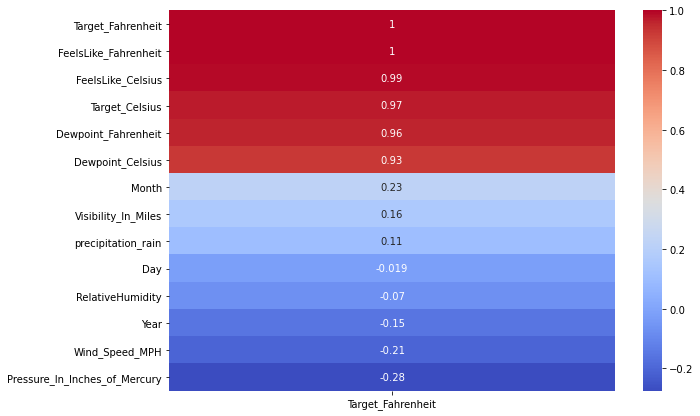

In [206]:
#heatmap to visualize the correlations between the 'Target_Fahrenheit'column and corr_matrix DataFrame. 
cm = corr_matrix[['Target_Fahrenheit']].sort_values(by='Target_Fahrenheit', ascending=False)
plt.figure(figsize=(10,7))
sns.heatmap(cm, cmap='coolwarm', annot=True)
plt.show()

In [207]:
new_categorical_columns = []

for column in grouped_df.columns:
    if df[column].dtype == 'object':
        new_categorical_columns.append(column)

print(new_categorical_columns)

['CurrentConditions', 'ConditionType', 'CloudCondition', 'MoonInfo', 'Timezone', 'SunInfo_Sun-UP']


In [208]:
for col in new_categorical_columns:
    num_unique = grouped_df[col].nunique()
    print(f"Number of unique values in {col}: {num_unique}")

Number of unique values in CurrentConditions: 17
Number of unique values in ConditionType: 2
Number of unique values in CloudCondition: 40
Number of unique values in MoonInfo: 8
Number of unique values in Timezone: 1
Number of unique values in SunInfo_Sun-UP: 2


In [209]:
for col in new_categorical_columns:
    grouped_df = grouped_df.drop(col, axis=1)

In [210]:
grouped_df.head(3)

,Year,Month,Day,RelativeHumidity,precipitation_rain,Wind_Speed_MPH,Dewpoint_Fahrenheit,Dewpoint_Celsius,FeelsLike_Fahrenheit,FeelsLike_Celsius,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,Target_Fahrenheit,Target_Celsius
0,2018,5,1,0.41200,0.0,12.100,47.25,8.50,72.75,22.75,29.25,10.00,72.75,22.75
1,2018,5,2,0.55175,0.0,9.775,58.50,14.75,76.50,24.75,29.00,10.00,76.50,24.75
2,2018,5,3,0.87450,0.0,7.500,65.00,18.50,69.25,20.75,29.00,9.25,69.25,20.75


# Data Preprocessing

In [214]:
#Performs feature scaling
from sklearn.preprocessing import StandardScaler

features = grouped_df.drop(['Year', 'Month', 'Day', 'Target_Fahrenheit'], axis=1)
target = grouped_df['Target_Fahrenheit']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Target_Fahrenheit'] = target


scaled_df

,RelativeHumidity,precipitation_rain,Wind_Speed_MPH,Dewpoint_Fahrenheit,Dewpoint_Celsius,FeelsLike_Fahrenheit,FeelsLike_Celsius,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,Target_Celsius,Target_Fahrenheit
0,-2.709662,-0.293721,1.845295,0.174892,-0.258554,0.972802,0.895996,-0.703213,0.628553,1.085605,72.75
1,-1.544453,-0.293721,1.151779,0.792000,0.570823,1.147558,1.112058,-1.285450,0.628553,1.304169,76.50
2,1.146575,-0.293721,0.473176,1.148552,1.068449,0.809696,0.679934,-1.285450,0.112221,0.867041,69.25
3,-0.735686,-0.293721,0.726720,0.558870,0.239072,0.728143,0.571903,-0.703213,0.628553,0.757760,67.50
4,-2.048891,-0.293721,-0.652856,0.024043,-0.457605,0.786395,0.652926,-0.120975,0.628553,0.839721,68.75
...,...,...,...,...,...,...,...,...,...,...,...
1805,0.642137,-0.293721,0.644691,-0.346223,-0.955231,-0.588356,-1.156593,-1.285450,-0.232000,-0.717547,43.50
1806,-0.183306,-0.293721,0.644691,-0.332509,-0.955231,-0.413600,-0.913523,-1.285450,0.112221,-0.498983,47.00
1807,-1.748730,-0.293721,1.673780,-0.579353,-1.286982,-0.145640,-0.535415,-1.285450,0.628553,-0.280419,50.50
1808,-1.290150,-0.293721,-1.167400,-0.469644,-1.121106,-0.040786,-0.427384,-1.285450,0.628553,-0.253099,51.00


In [215]:
#Extract column from grouped_df
df_new = grouped_df[['Year', 'Month', 'Day']].copy()

In [216]:
df_new

,Year,Month,Day
0,2018,5,1
1,2018,5,2
2,2018,5,3
3,2018,5,4
4,2018,5,5
...,...,...,...
1805,2023,4,30
1806,2023,5,1
1807,2023,5,2
1808,2023,5,3


In [219]:
scaled_df

,RelativeHumidity,precipitation_rain,Wind_Speed_MPH,Dewpoint_Fahrenheit,Dewpoint_Celsius,FeelsLike_Fahrenheit,FeelsLike_Celsius,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,Target_Celsius,Target_Fahrenheit
0,-2.709662,-0.293721,1.845295,0.174892,-0.258554,0.972802,0.895996,-0.703213,0.628553,1.085605,72.75
1,-1.544453,-0.293721,1.151779,0.792000,0.570823,1.147558,1.112058,-1.285450,0.628553,1.304169,76.50
2,1.146575,-0.293721,0.473176,1.148552,1.068449,0.809696,0.679934,-1.285450,0.112221,0.867041,69.25
3,-0.735686,-0.293721,0.726720,0.558870,0.239072,0.728143,0.571903,-0.703213,0.628553,0.757760,67.50
4,-2.048891,-0.293721,-0.652856,0.024043,-0.457605,0.786395,0.652926,-0.120975,0.628553,0.839721,68.75
...,...,...,...,...,...,...,...,...,...,...,...
1805,0.642137,-0.293721,0.644691,-0.346223,-0.955231,-0.588356,-1.156593,-1.285450,-0.232000,-0.717547,43.50
1806,-0.183306,-0.293721,0.644691,-0.332509,-0.955231,-0.413600,-0.913523,-1.285450,0.112221,-0.498983,47.00
1807,-1.748730,-0.293721,1.673780,-0.579353,-1.286982,-0.145640,-0.535415,-1.285450,0.628553,-0.280419,50.50
1808,-1.290150,-0.293721,-1.167400,-0.469644,-1.121106,-0.040786,-0.427384,-1.285450,0.628553,-0.253099,51.00


In [220]:
#concatenate 
merged_df = pd.concat([df_new, scaled_df], axis=1)
merged_df

,Year,Month,Day,RelativeHumidity,precipitation_rain,Wind_Speed_MPH,Dewpoint_Fahrenheit,Dewpoint_Celsius,FeelsLike_Fahrenheit,FeelsLike_Celsius,Pressure_In_Inches_of_Mercury,Visibility_In_Miles,Target_Celsius,Target_Fahrenheit
0,2018,5,1,-2.709662,-0.293721,1.845295,0.174892,-0.258554,0.972802,0.895996,-0.703213,0.628553,1.085605,72.75
1,2018,5,2,-1.544453,-0.293721,1.151779,0.792000,0.570823,1.147558,1.112058,-1.285450,0.628553,1.304169,76.50
2,2018,5,3,1.146575,-0.293721,0.473176,1.148552,1.068449,0.809696,0.679934,-1.285450,0.112221,0.867041,69.25
3,2018,5,4,-0.735686,-0.293721,0.726720,0.558870,0.239072,0.728143,0.571903,-0.703213,0.628553,0.757760,67.50
4,2018,5,5,-2.048891,-0.293721,-0.652856,0.024043,-0.457605,0.786395,0.652926,-0.120975,0.628553,0.839721,68.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,2023,4,30,0.642137,-0.293721,0.644691,-0.346223,-0.955231,-0.588356,-1.156593,-1.285450,-0.232000,-0.717547,43.50
1806,2023,5,1,-0.183306,-0.293721,0.644691,-0.332509,-0.955231,-0.413600,-0.913523,-1.285450,0.112221,-0.498983,47.00
1807,2023,5,2,-1.748730,-0.293721,1.673780,-0.579353,-1.286982,-0.145640,-0.535415,-1.285450,0.628553,-0.280419,50.50
1808,2023,5,3,-1.290150,-0.293721,-1.167400,-0.469644,-1.121106,-0.040786,-0.427384,-1.285450,0.628553,-0.253099,51.00


## Model Evaluation and Model Selection

In [221]:
final_df = merged_df[['Year', 'Month', 'Day', 'Target_Fahrenheit']].copy()
final_df

,Year,Month,Day,Target_Fahrenheit
0,2018,5,1,72.75
1,2018,5,2,76.50
2,2018,5,3,69.25
3,2018,5,4,67.50
4,2018,5,5,68.75
...,...,...,...,...
1805,2023,4,30,43.50
1806,2023,5,1,47.00
1807,2023,5,2,50.50
1808,2023,5,3,51.00


In [222]:
final_df['Target_Fahrenheit'] = np.round(final_df['Target_Fahrenheit'])

In [228]:
final_df

,Year,Month,Day,Target_Fahrenheit
0,2018,5,1,73.0
1,2018,5,2,76.0
2,2018,5,3,69.0
3,2018,5,4,68.0
4,2018,5,5,69.0
...,...,...,...,...
1805,2023,4,30,44.0
1806,2023,5,1,47.0
1807,2023,5,2,50.0
1808,2023,5,3,51.0


In [224]:
#Features selection
from sklearn.model_selection import train_test_split

X = final_df[['Year', 'Month', 'Day']]
y = final_df['Target_Fahrenheit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
#RendomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate R2 score
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest R2 score:", rf_r2)

print("Random Forest MSE:", rf_mse)

Random Forest R2 score: 0.889556794715603
Random Forest MSE: 42.77146325966851


In [226]:
#DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Calculate R2 score
dt_r2 = r2_score(y_test, dt_predictions)
print("Linear Regression R2 score:", dt_r2)
print("Decision Tree MSE:", dt_mse)

Linear Regression R2 score: 0.8580662262345704
Decision Tree MSE: 54.966850828729285


## User Prediction

In [236]:
#Predict wether of 2024 taking input of Month and day
#user_year = int(input("Enter the year: "))
user_year=2024
user_month = int(input("Enter the month: "))
user_day = int(input("Enter the day: "))
# Create a dataframe with user input
user_input = pd.DataFrame({'Year': [user_year], 'Month': [user_month], 'Day': [user_day]})

# Predict the Celsius temperature
user_prediction = rf.predict(user_input)

# Print the predicted temperature
print("Predicted temperature of 2024 in Fahrenheit :", int(user_prediction[0]))

Enter the month: 2
Enter the day: 10
Predicted temperature of 2024 in Fahrenheit : 34
